/Users/aaronhu/Library/Python/3.8/lib/python/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Store 1 - Top 10 Frequent Itemsets
   support              itemsets
0     0.32    (Activity Monitor)
5     0.16         (Smart Scale)
1     0.12     (Fitness Tracker)
3     0.12  (Heart Rate Monitor)
4     0.08        (Music Player)
6     0.08         (Stairmaster)
7     0.08           (Treadmill)
2     0.04       (Gym Equipment)


Store 2 - Top 10 Frequent Itemsets
   support            itemsets
4     0.32       (Smart Scale)
3     0.20      (Music Player)
1     0.16   (Fitness Tracker)
0     0.08  (Activity Monitor)
2     0.08     (Gym Equipment)
5     0.08       (Stairmaster)
6     0.08         (Treadmill)


Store 3 - Top 10 Frequent Itemsets
   support              itemsets
0     0.24    (Activity Monitor)
4     0.20         (Smart Scale)
6     0.20           (Treadmill)
2     0.16  (Heart Rate Monitor)
3     0.08        (Music Player)
5     0.08         (Stairmaster)
1     0.04     (Fitness Tracker)


Store 4 - Top 10 Frequent Itemsets
   support              itemsets
0     0.32  

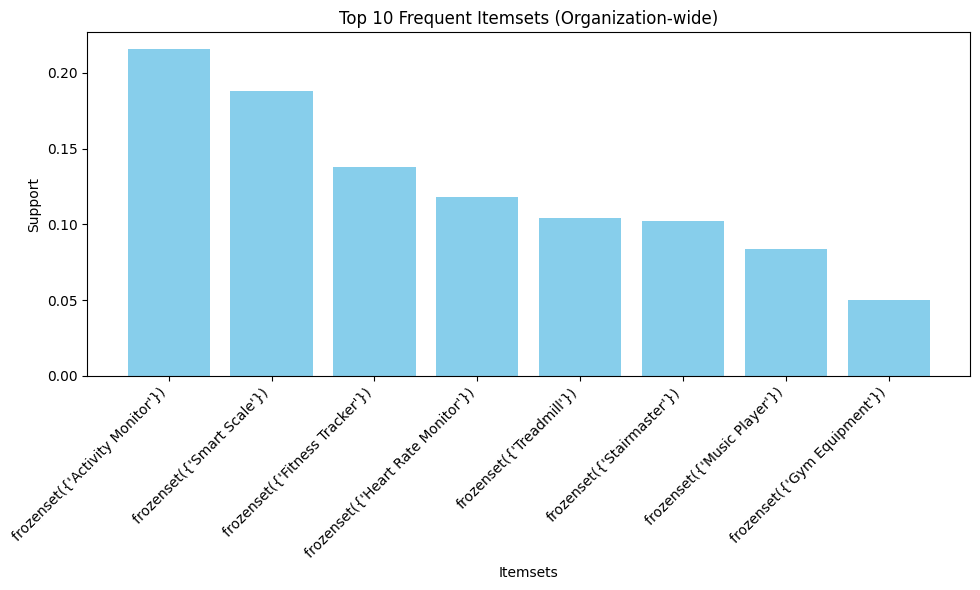

In [5]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# Load the sales data
df = pd.read_csv('sales_data.csv')

# Preprocess the data
# Create a basket for each store
basket = df.groupby(['StoreID', 'OrderID', 'Product Name'])['Product Price'] \
           .sum().unstack().reset_index().fillna(0).set_index(['StoreID', 'OrderID'])

basket = basket.applymap(lambda x: 1 if x > 0 else 0).astype(bool)

# Perform Market Basket Analysis for each store
store_ids = df['StoreID'].unique()
store_results = {}

for store_id in store_ids:
    store_basket = basket.loc[store_id]
    frequent_itemsets = apriori(store_basket, min_support=0.01, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=len(frequent_itemsets))
    store_results[store_id] = {
        'frequent_itemsets': frequent_itemsets,
        'rules': rules
    }

# Perform Market Basket Analysis for the entire organization
frequent_itemsets_org = apriori(basket.groupby(level=1).sum(), min_support=0.01, use_colnames=True)
rules_org = association_rules(frequent_itemsets_org, metric="lift", min_threshold=1, num_itemsets=len(frequent_itemsets_org))

# Display the results
for store_id in store_ids:
    print(f"Store {store_id} - Top 10 Frequent Itemsets")
    print(store_results[store_id]['frequent_itemsets'].sort_values(by='support', ascending=False).head(10))
    print("\n")

print("Organization-wide - Top 10 Frequent Itemsets")
print(frequent_itemsets_org.sort_values(by='support', ascending=False).head(10))

# Plotting the top 10 frequent itemsets for the entire organization
top_itemsets_org = frequent_itemsets_org.sort_values(by='support', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_itemsets_org['itemsets'].astype(str), top_itemsets_org['support'], color='skyblue')
plt.title('Top 10 Frequent Itemsets (Organization-wide)')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
